# Maps of vaccination

In [1]:
import matplotlib.dates as mdates
import util
import pandas as pd
import geobr
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import pathlib
from PIL import Image

## Loading data

In [2]:
df_vaccination = pd.read_csv('data/output/df_vaccination.csv', index_col=0)
df_time_series_vaccination = pd.read_csv('data/output/df_time_series_vaccination.csv')

In [3]:
df_time_series_vaccination['date'] = pd.to_datetime(df_time_series_vaccination['date'])

In [4]:
df_vaccination

,code_municipality_6,code_municipality_7,population,date,cumulative_doses,cumulative_vaccinated_people,cumulative_full_vaccinated_people,Doses per 100 people (2020-2022),% people vaccinated (2020-2022),% people fully vaccinated (2020-2022),...,full_vaccinated_people_accumulated_2020,Doses per 100 people (2020),% people vaccinated (2020),% people fully vaccinated (2020),total_doses_accumulated_2021,vaccinated_people_accumulated_2021,full_vaccinated_people_accumulated_2021,Doses per 100 people (2020-2021),% people vaccinated (2020-2021),% people fully vaccinated (2020-2021)
0,110001,1100015,21495,2022-12-31,50300,21166,18920,234.007909,98.469411,88.020470,...,0.0,0.0,0.0,0.0,40100,19567,17248,186.555013,91.030472,80.241917
1,110002,1100023,96833,2022-12-31,193189,85163,71276,199.507399,87.948323,73.607138,...,0.0,0.0,0.0,0.0,158943,80542,66124,164.141357,83.176190,68.286638
2,110003,1100031,5363,2022-12-31,12539,5127,4559,233.805706,95.599478,85.008391,...,0.0,0.0,0.0,0.0,9721,4745,4117,181.260489,88.476599,76.766735
3,110004,1100049,86895,2022-12-31,177380,75010,64188,204.131423,86.322573,73.868462,...,0.0,0.0,0.0,0.0,139026,70499,58567,159.993095,81.131250,67.399735
4,110005,1100056,15890,2022-12-31,34633,14294,12513,217.954688,89.955947,78.747640,...,0.0,0.0,0.0,0.0,26936,13282,11335,169.515419,83.587162,71.334172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,522200,5222005,14956,2022-12-31,40878,14328,13659,273.321744,95.801016,91.327895,...,0.0,0.0,0.0,0.0,27068,12741,11667,180.984220,85.189890,78.008826
5566,522205,5222054,8768,2022-12-31,24739,9644,8634,282.151004,109.990876,98.471715,...,0.0,0.0,0.0,0.0,17659,8792,7763,201.402828,100.273723,88.537865
5567,522220,5222203,4215,2022-12-31,9018,3703,3108,213.950178,87.852906,73.736655,...,0.0,0.0,0.0,0.0,6176,3216,2560,146.524318,76.298932,60.735469
5568,522230,5222302,5815,2022-12-31,13909,5388,4805,239.191745,92.656922,82.631126,...,0.0,0.0,0.0,0.0,9758,4855,4282,167.807395,83.490972,73.637145


In [5]:
try:
    filename_map_municipalities = 'data/map_municipalities_2010.geojson'
    path_map_municipalities = pathlib.Path(filename_map_municipalities)
    map_municipalities = gpd.read_file(path_map_municipalities)

    filename_map_states = 'data/map_states_2010.geojson'
    path_map_states = pathlib.Path(filename_map_states)
    map_states = gpd.read_file(path_map_states)
except:
    map_municipalities = geobr.read_municipality(year=2010)
    map_states =  geobr.read_state(year=2010)
    map_municipalities.to_file('data/map_municipalities_2010.geojson', driver='GeoJSON')
    map_states.to_file('data/map_states_2010.geojson', driver='GeoJSON')

In [6]:
df_map_municipalities = map_municipalities.merge(df_vaccination, how="left", left_on="code_muni", right_on="code_municipality_7")

In [7]:
df_map_municipalities = df_map_municipalities.loc[df_map_municipalities['name_muni'].isin(['Lagoa Mirim', 'Lagoa Dos Patos']) == False]

In [8]:
df_map_municipalities[df_map_municipalities['population'].isna()]

,code_muni,name_muni,code_state,abbrev_state,geometry,code_municipality_6,code_municipality_7,population,date,cumulative_doses,...,full_vaccinated_people_accumulated_2020,Doses per 100 people (2020),% people vaccinated (2020),% people fully vaccinated (2020),total_doses_accumulated_2021,vaccinated_people_accumulated_2021,full_vaccinated_people_accumulated_2021,Doses per 100 people (2020-2021),% people vaccinated (2020-2021),% people fully vaccinated (2020-2021)
223,1504703.0,Moju,15.0,PA,"POLYGON ((-48.55770 -1.71801, -48.53041 -1.699...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4418,4207007.0,Içara,42.0,SC,"POLYGON ((-49.23878 -28.67659, -49.22586 -28.6...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4421,4207304.0,Imbituba,42.0,SC,"MULTIPOLYGON (((-48.64276 -28.15454, -48.64479...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4695,4304804.0,Carlos Barbosa,43.0,RS,"MULTIPOLYGON (((-51.49027 -29.27708, -51.49019...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5152,5005681.0,Mundo Novo,50.0,MS,"MULTIPOLYGON (((-54.36228 -23.90302, -54.36947...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Map visualizations

In [9]:
custom_points = {}

point = map_states[map_states.abbrev_state == 'RJ'].geometry.centroid.values[0]
point = Point(point.x, point.y - 2.2)
custom_points['RJ'] = point

point = map_states[map_states.abbrev_state == 'SC'].geometry.centroid.values[0]
point = Point(point.x + 0.6, point.y - 0.8)
custom_points['SC'] = point

point = map_states[map_states.abbrev_state == 'ES'].geometry.centroid.values[0]
point = Point(point.x + 2.1, point.y - 1)
custom_points['ES'] = point

point = map_states[map_states.abbrev_state == 'SE'].geometry.centroid.values[0]
point = Point(point.x + 1.8, point.y - 1.5)
custom_points['SE'] = point

point = map_states[map_states.abbrev_state == 'AL'].geometry.centroid.values[0]
point = Point(point.x + 1.8, point.y - 1)
custom_points['AL'] = point

point = map_states[map_states.abbrev_state == 'PE'].geometry.centroid.values[0]
point = Point(point.x + 4.1, point.y - 0.7)
custom_points['PE'] = point

point = map_states[map_states.abbrev_state == 'PB'].geometry.centroid.values[0]
point = Point(point.x + 3.1, point.y - 0.5)
custom_points['PB'] = point

point = map_states[map_states.abbrev_state == 'RN'].geometry.centroid.values[0]
point = Point(point.x + 2.8, point.y)
custom_points['RN'] = point

point = map_states[map_states.abbrev_state == 'PI'].geometry.centroid.values[0]
point = Point(point.x + 1, point.y)
custom_points['PI'] = point

point = map_states[map_states.abbrev_state == 'DF'].geometry.centroid.values[0]
point = Point(point.x, point.y + 0.35)
custom_points['DF'] = point

point = map_states[map_states.abbrev_state == 'GO'].geometry.centroid.values[0]
point = Point(point.x, point.y - 1.4)
custom_points['GO'] = point

point = map_states[map_states.abbrev_state == 'AC'].geometry.centroid.values[0]
point = Point(point.x, point.y - 0.4)
custom_points['AC'] = point

<ipython-input-9-14fc443e71bc>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  point = map_states[map_states.abbrev_state == 'RJ'].geometry.centroid.values[0]
<ipython-input-9-14fc443e71bc>:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  point = map_states[map_states.abbrev_state == 'SC'].geometry.centroid.values[0]
<ipython-input-9-14fc443e71bc>:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  point = map_states[map_states.abbrev_state == 'ES'].geometry.centroid.values[0]
<ipython-input-9-14fc443e71bc>:15: UserWarning: Geometry is in a geographic CRS. Results from 'c

In [10]:
df_map_municipalities.columns

Index(['code_muni', 'name_muni', 'code_state', 'abbrev_state', 'geometry',
       'code_municipality_6', 'code_municipality_7', 'population', 'date',
       'cumulative_doses', 'cumulative_vaccinated_people',
       'cumulative_full_vaccinated_people', 'Doses per 100 people (2020-2022)',
       '% people vaccinated (2020-2022)',
       '% people fully vaccinated (2020-2022)',
       'total_doses_accumulated_first_semester_2020',
       'vaccinated_people_accumulated_first_semester_2020',
       'full_vaccinated_people_accumulated_first_semester_2020',
       'Doses per 100 people (1/2020)', '% people vaccinated (1/2020)',
       '% people fully vaccinated (1/2020)', 'total_doses_accumulated_2020',
       'vaccinated_people_accumulated_2020',
       'full_vaccinated_people_accumulated_2020',
       'Doses per 100 people (2020)', '% people vaccinated (2020)',
       '% people fully vaccinated (2020)', 'total_doses_accumulated_2021',
       'vaccinated_people_accumulated_2021',
       'fu

In [11]:
df_map_municipalities[df_map_municipalities['name_muni']=='Januária']

,code_muni,name_muni,code_state,abbrev_state,geometry,code_municipality_6,code_municipality_7,population,date,cumulative_doses,...,full_vaccinated_people_accumulated_2020,Doses per 100 people (2020),% people vaccinated (2020),% people fully vaccinated (2020),total_doses_accumulated_2021,vaccinated_people_accumulated_2021,full_vaccinated_people_accumulated_2021,Doses per 100 people (2020-2021),% people vaccinated (2020-2021),% people fully vaccinated (2020-2021)
2641,3135209.0,Januária,31.0,MG,"MULTIPOLYGON (((-44.20200 -15.17643, -44.19149...",313520.0,3135209.0,65130.0,2022-12-31,141807.0,...,0.0,0.0,0.0,0.0,97095.0,49425.0,42216.0,149.078766,75.886688,64.818056


In [12]:
def plot_map_vaccination(df, width=34.8, height=34.8, nrows=2, ncols=2, chart_name='Doses per 100 people',
                         columns = ['Doses per 100 people (1/2020)', 'Doses per 100 people (2020)', 'Doses per 100 people (2020-2021)', 'Doses per 100 people (2020-2022)'],
                         titles = ['a) 2020 (first half)', 'b) 2020', 'c) 2020-2021', 'd) 2020-2022'],
                         highlight_outliers = [False, False, False, False], 
                         label_bar_legend=['Doses per 100 people','Doses per 100 people','Doses per 100 people','Doses per 100 people']):
    
    ignore_outliers = []
    for i in highlight_outliers:
        if type(i) == bool:
            ignore_outliers.append(i==False)
        else:
            ignore_outliers.append(False)

    df = df.copy()

    linewidth_estados = 0.4
    # linewidth_municipios = linewidth_estados * 0.000001
    linewidth_municipios = 0

    sns.set(font_scale=1.1)
    sns.set_style("ticks")
    fig, ax = plt.subplots(figsize=(util.centimeter_to_inch(width), util.centimeter_to_inch(height)), nrows=nrows, ncols=ncols, subplot_kw=dict(aspect='equal'))
    ax = ax.ravel()
    
    for j  in range(len(columns)):
        column = columns[j]
        print(column)
        ax_atual = ax[j]
        
        if type(highlight_outliers[j]) == int:
            outlier_top_threshold = highlight_outliers[j]
        else:
            outlier_top_threshold = df[column].quantile(0.75) + ((df[column].quantile(0.75) - df[column].quantile(0.25)) * 1.5)        
        print('outlier_top_threshold: '+str(outlier_top_threshold))        
        
        df_top_outliers = df.loc[((df[column] > outlier_top_threshold) & (ignore_outliers[j]==False)) | (df[column].isna())].copy()
        df_normal = df.loc[((df[column] <= outlier_top_threshold) ) | (ignore_outliers[j]==True)]
        
        ax_atual.title.set_text(titles[j])

        missing_kwds = dict(color='grey', label='No data')

        normal_plot = df_normal.plot(
            column=column,
            cmap='Blues',
            legend=True,            
            legend_kwds={"label": label_bar_legend[j],"orientation": "horizontal","pad": -0.025},
            edgecolor="gray",            
            linewidth=linewidth_municipios,
            categorical=False,    
            missing_kwds=missing_kwds,
            ax=ax_atual
        )
                
        if ignore_outliers[j] == False:            
            df_top_outliers.loc[df_top_outliers[column] > outlier_top_threshold, 'outlier'] = 'Outlier'   
            print(f'outliers: ',len(df_top_outliers[df_top_outliers['outlier'] == 'Outlier']))
            print(f'NA: ',len(df_top_outliers[df_top_outliers['outlier'].isna()]))                
            
            outlier_plot = df_top_outliers.plot(
                column='outlier',
                cmap='Dark2',            
                legend=j==0,            
                edgecolor="gray",
                linewidth=linewidth_municipios,
                categorical=True,
                missing_kwds=missing_kwds,
                legend_kwds={'bbox_to_anchor': (1.1,1.0)},
                ax=ax_atual
            )  
            
            if j == 0:
                labels = outlier_plot.get_legend().texts
                handles = outlier_plot.get_legend().legend_handles                
                fig.legend(handles=handles, labels=[label.get_text() for label in labels],loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.1))
                outlier_plot.legend([], frameon=False)

        map_states.boundary.plot(edgecolor="black", linewidth=linewidth_estados, ax=ax_atual)

        map_states[map_states.abbrev_state.isin(['RJ', 'SC', 'ES', 'SE', 'AL', 'PE', 'PB', 'RN', 'DF', 'GO', 'PI', 'AC']) == False].apply(lambda x: ax_atual.annotate(text=x.abbrev_state, xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

        for point in custom_points.keys():
            ax_atual.text(custom_points[point].x, custom_points[point].y, point, ha='center')

        ax_atual.axis("off")
                    
    if (len(columns)%2 != 0) & (nrows > 1):
        ax[len(columns)].remove()

    fig.tight_layout()

    fig.savefig('images/map_vaccinataion_'+chart_name+'.png', bbox_inches="tight")    
    fig.savefig('images/map_vaccinataion_'+chart_name+'.pdf', bbox_inches="tight")

    plt.savefig('images/map_vaccinataion_'+chart_name+'.tiff', format='tiff', dpi=300, transparent=False, bbox_inches='tight')
    img = Image.open('images/map_vaccinataion_'+chart_name+'.tiff')
    img.save('images/map_vaccinataion_'+chart_name+'_compressed.tiff', compression="tiff_lzw")    
    plt.show()
    
    return handles, labels

Doses per 100 people (1/2020)
outlier_top_threshold: 0.0
Doses per 100 people (2020)
outlier_top_threshold: 0.0
Doses per 100 people (2020-2021)
outlier_top_threshold: 251.69106469739017
Doses per 100 people (2020-2022)
outlier_top_threshold: 380.7090660786306


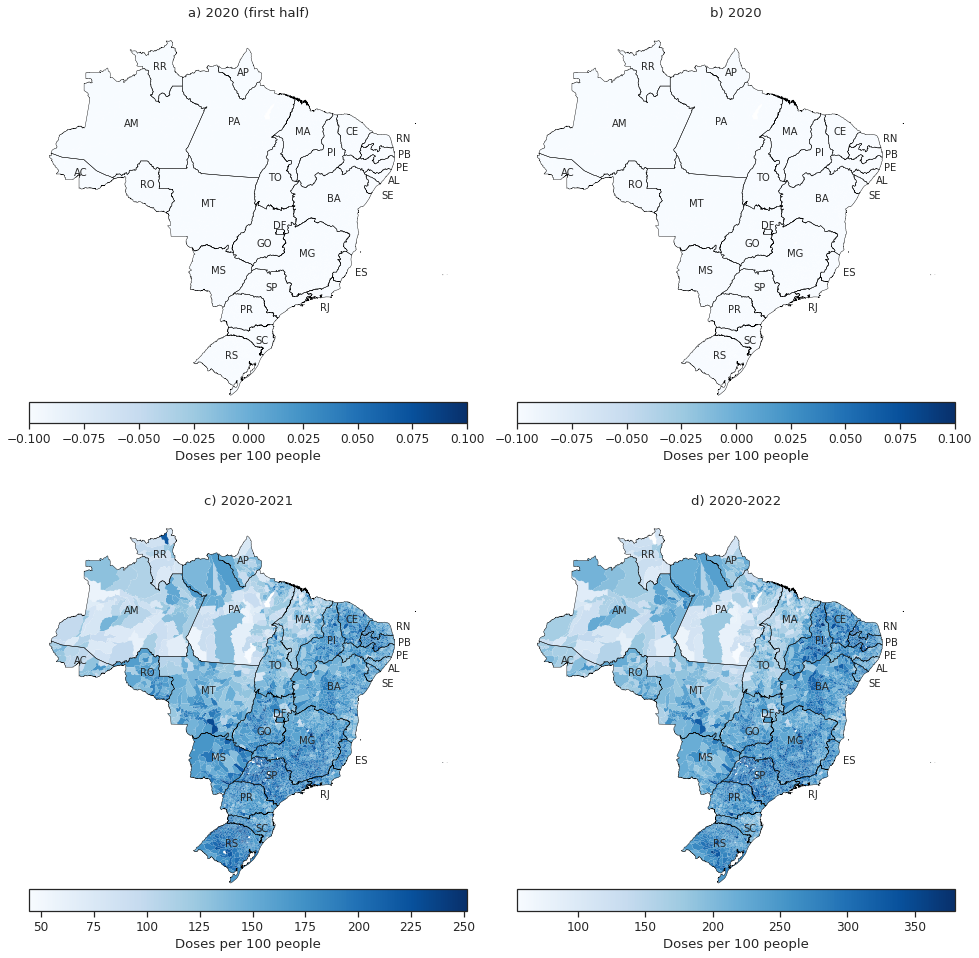

UnboundLocalError: local variable 'handles' referenced before assignment

In [13]:
plot_map_vaccination(df_map_municipalities)

% people vaccinated (1/2020)
outlier_top_threshold: 0.0
outlier_bottom_threshold: 0.0
% people vaccinated (2020)
outlier_top_threshold: 0.0
outlier_bottom_threshold: 0.0
% people vaccinated (2020-2021)
outlier_top_threshold: 112.14539401757645
outlier_bottom_threshold: 54.1875486949383


<ipython-input-68-adcadd3db9be>:54: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  outlier_plot = df_top_outliers.plot(


% people vaccinated (2020-2022)
outlier_top_threshold: 124.95698714898722
outlier_bottom_threshold: 62.1209767632171


<ipython-input-68-adcadd3db9be>:54: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  outlier_plot = df_top_outliers.plot(


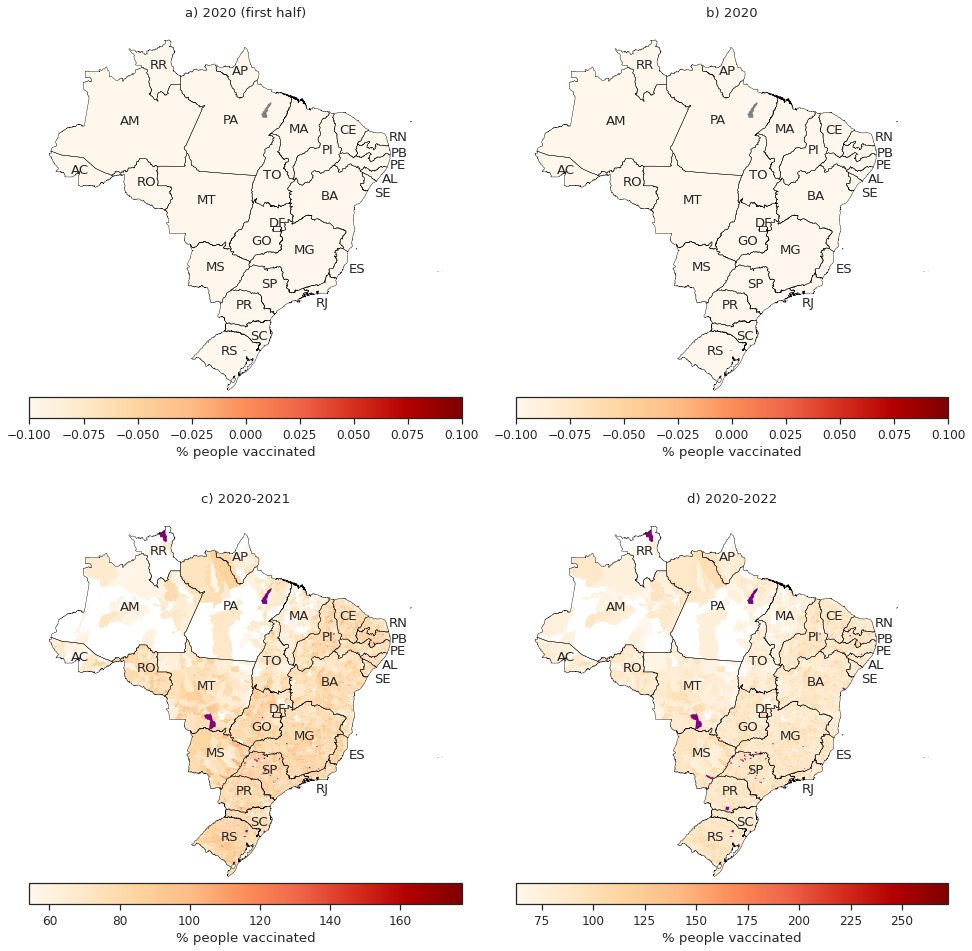

In [70]:
plot_map_vaccination(df_map_municipalities, label='% people vaccinated',
                         columns = ['% people vaccinated (1/2020)', '% people vaccinated (2020)', '% people vaccinated (2020-2021)', '% people vaccinated (2020-2022)'])

% people fully vaccinated (1/2020)
outlier_top_threshold: 0.0
outlier_bottom_threshold: 0.0
% people fully vaccinated (2020)
outlier_top_threshold: 0.0
outlier_bottom_threshold: 0.0
% people fully vaccinated (2020-2021)
outlier_top_threshold: 108.70552811941226
outlier_bottom_threshold: 39.22942578161146


<ipython-input-68-adcadd3db9be>:54: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  outlier_plot = df_top_outliers.plot(


% people fully vaccinated (2020-2022)
outlier_top_threshold: 121.93042948409564
outlier_bottom_threshold: 49.598409653018145


<ipython-input-68-adcadd3db9be>:54: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  outlier_plot = df_top_outliers.plot(


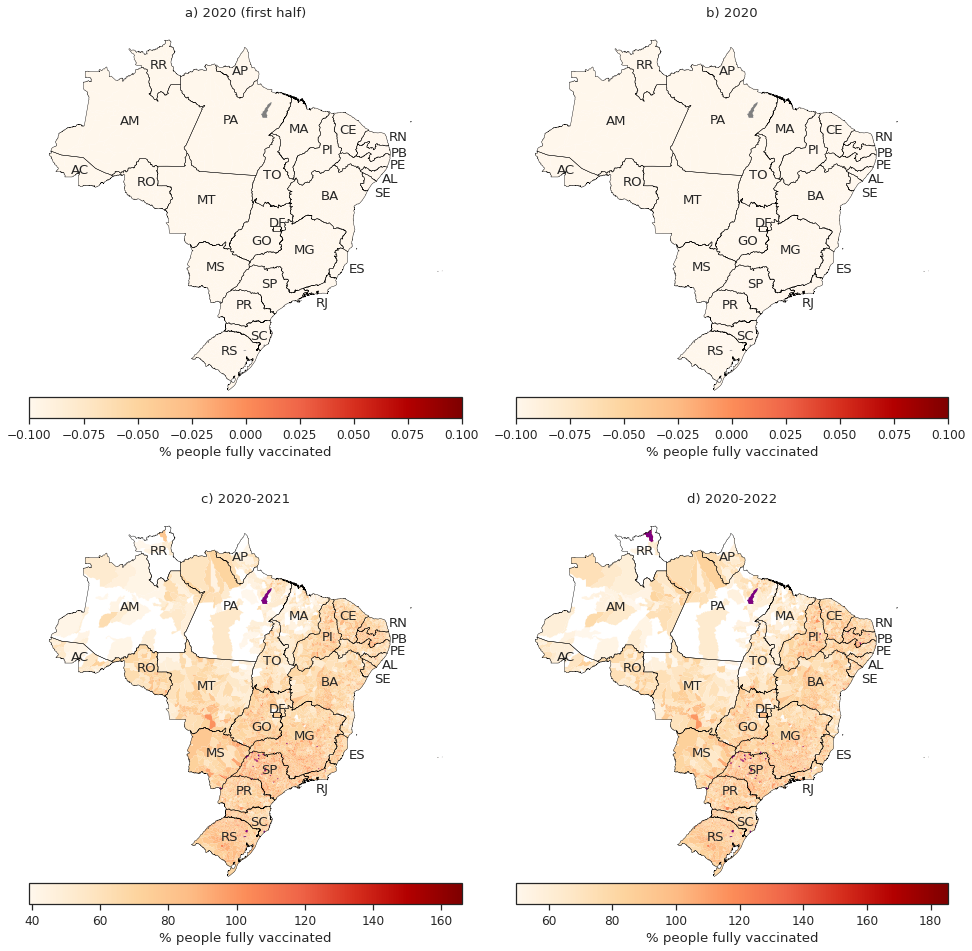

In [71]:
plot_map_vaccination(df_map_municipalities, label='% people fully vaccinated',
                         columns = ['% people fully vaccinated (1/2020)', '% people fully vaccinated (2020)', '% people fully vaccinated (2020-2021)', '% people fully vaccinated (2020-2022)'])

In [73]:
df_map_municipalities.columns

Index(['code_muni', 'name_muni', 'code_state', 'abbrev_state', 'geometry',
       'code_municipality_6', 'code_municipality_7', 'population', 'date',
       'cumulative_doses', 'cumulative_vaccinated_people',
       'cumulative_full_vaccinated_people', 'Doses per 100 people (2020-2022)',
       '% people vaccinated (2020-2022)',
       '% people fully vaccinated (2020-2022)',
       'total_doses_accumulated_first_semester_2020',
       'vaccinated_people_accumulated_first_semester_2020',
       'full_vaccinated_people_accumulated_first_semester_2020',
       'Doses per 100 people (1/2020)', '% people vaccinated (1/2020)',
       '% people fully vaccinated (1/2020)', 'total_doses_accumulated_2020',
       'vaccinated_people_accumulated_2020',
       'full_vaccinated_people_accumulated_2020',
       'Doses per 100 people (2020)', '% people vaccinated (2020)',
       '% people fully vaccinated (2020)', 'total_doses_accumulated_2021',
       'vaccinated_people_accumulated_2021',
       'fu

In [111]:
df_map_municipalities[df_map_municipalities['% people vaccinated (2020-2021)'].isna()]

,code_muni,name_muni,code_state,abbrev_state,geometry,code_municipality_6,code_municipality_7,population,date,cumulative_doses,...,full_vaccinated_people_accumulated_2020,Doses per 100 people (2020),% people vaccinated (2020),% people fully vaccinated (2020),total_doses_accumulated_2021,vaccinated_people_accumulated_2021,full_vaccinated_people_accumulated_2021,Doses per 100 people (2020-2021),% people vaccinated (2020-2021),% people fully vaccinated (2020-2021)
223,1504703.0,Moju,15.0,PA,"POLYGON ((-48.55770 -1.71801, -48.53041 -1.699...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4418,4207007.0,Içara,42.0,SC,"POLYGON ((-49.23878 -28.67659, -49.22586 -28.6...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4421,4207304.0,Imbituba,42.0,SC,"MULTIPOLYGON (((-48.64276 -28.15454, -48.64479...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4695,4304804.0,Carlos Barbosa,43.0,RS,"MULTIPOLYGON (((-51.49027 -29.27708, -51.49019...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5152,5005681.0,Mundo Novo,50.0,MS,"MULTIPOLYGON (((-54.36228 -23.90302, -54.36947...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


% people vaccinated (2020-2022)
outlier_top_threshold: 100
outliers:  1603
NA:  5


<ipython-input-12-35d9e48d9d78>:76: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  outlier_plot.legend([], frameon=False)


% people fully vaccinated (2020-2022)
outlier_top_threshold: 100
outliers:  748
NA:  5
Doses per 100 people (2020-2022)
outlier_top_threshold: 380.7090660786306
outliers:  42
NA:  5


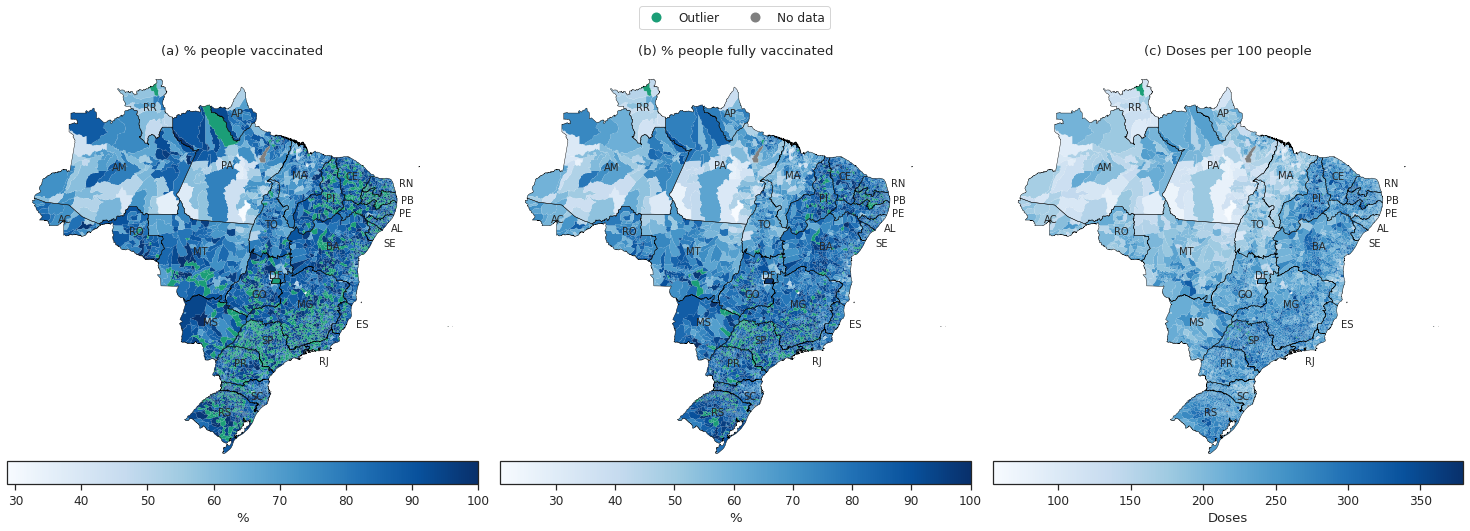

In [13]:
handles, labels = plot_map_vaccination(df_map_municipalities, width=52.2, height=17.4, nrows=1, ncols=3, chart_name='2021_2022',                     
                         columns = ['% people vaccinated (2020-2022)', '% people fully vaccinated (2020-2022)', 'Doses per 100 people (2020-2022)'],
                         titles = ['(a) % people vaccinated', '(b) % people fully vaccinated', '(c) Doses per 100 people'],
                         highlight_outliers = [100, 100, True],
                                       label_bar_legend=['%', '%', 'Doses'])

## Plotting time series

In [13]:
national_population = df_vaccination['population'].sum()

In [18]:
df_national = df_time_series_vaccination.drop(columns=['code_municipality_6']).groupby('date').sum().reset_index()

In [20]:
df_national['percentual_vaccinated_people'] = df_national['cumulative_vaccinated_people'] / national_population * 100
df_national['percentual_full_vaccinated_people'] = df_national['cumulative_full_vaccinated_people'] / national_population * 100
df_national['doses_per_100_inhabitants'] = df_national['cumulative_doses'] / national_population * 100

In [21]:
df_national

,date,cumulative_doses,cumulative_vaccinated_people,cumulative_full_vaccinated_people,percentual_vaccinated_people,percentual_full_vaccinated_people,doses_per_100_inhabitants
0,2021-01-17,1370,1007,212,0.000497,0.000105,0.000676
1,2021-01-18,4475,3795,561,0.001872,0.000277,0.002207
2,2021-01-19,66318,64628,898,0.031874,0.000443,0.032708
3,2021-01-20,413545,408920,1632,0.201677,0.000805,0.203958
4,2021-01-21,804725,795300,2418,0.392236,0.001193,0.396885
...,...,...,...,...,...,...,...
709,2022-12-27,500452906,191763161,175316151,94.576267,86.464715,246.819917
710,2022-12-28,500595353,191779620,175335070,94.584384,86.474046,246.890171
711,2022-12-29,500715435,191794260,175351081,94.591605,86.481942,246.949395
712,2022-12-30,500764388,191800110,175357717,94.594490,86.485215,246.973538


In [41]:
df_chart_national = df_national[['date', 'percentual_vaccinated_people', 'percentual_full_vaccinated_people','doses_per_100_inhabitants']].copy()
df_chart_national = df_chart_national.rename(columns={'percentual_vaccinated_people': '% people vaccinated', 'percentual_full_vaccinated_people': '% people fully vaccinated', 'doses_per_100_inhabitants': 'Vaccine doses per 100 people'})
df_chart_national = pd.melt(df_chart_national, id_vars=['date'], 
                  value_vars=['% people vaccinated', '% people fully vaccinated', 'Vaccine doses per 100 people'], 
                  var_name='label', value_name='value')

In [38]:
df_chart_national

,date,label,value
0,2021-01-17,% people vaccinated,0.000497
1,2021-01-18,% people vaccinated,0.001872
2,2021-01-19,% people vaccinated,0.031874
3,2021-01-20,% people vaccinated,0.201677
4,2021-01-21,% people vaccinated,0.392236
...,...,...,...
2137,2022-12-27,Vaccine doses per people,246.819917
2138,2022-12-28,Vaccine doses per people,246.890171
2139,2022-12-29,Vaccine doses per people,246.949395
2140,2022-12-30,Vaccine doses per people,246.973538


In [32]:
myFmt = mdates.DateFormatter('%m/%Y')
style = dict(color='black')
sns.set_style("ticks")

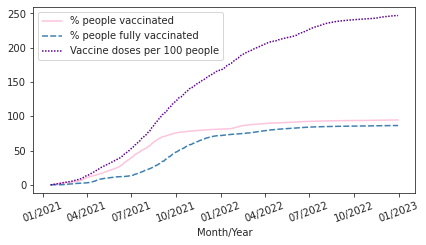

In [42]:
fig, ax = plt.subplots(figsize=(util.centimeter_to_inch(17.4), util.centimeter_to_inch(8.7)))
sns.lineplot(data=df_chart_national, x="date", y="value", markers=False, hue='label', style='label', palette=util.get_default_colors_categorical_seaborn(3))
ax.xaxis.set_major_formatter(myFmt)
plt.xlabel('Month/Year')
plt.ylabel(None)
plt.xticks(rotation=20)
plt.legend(title = None)
plt.savefig('images/national_vaccination_time_series.pdf', bbox_inches="tight")
plt.show()

## Statistics

In [3]:
df_vaccination[['% people vaccinated (2020-2022)', '% people fully vaccinated (2020-2022)', 'Doses per 100 people (2020-2022)']].describe().T.drop(columns=['count']).round().astype(int)  

,mean,std,min,25%,50%,75%,max
% people vaccinated (2020-2022),93,14,29,86,94,101,272
% people fully vaccinated (2020-2022),85,15,21,77,86,95,185
Doses per 100 people (2020-2022),252,52,55,221,254,285,576


In [6]:
df_vaccination[['% people fully vaccinated (2020-2021)','% people fully vaccinated (2020-2022)']].describe().T.drop(columns=['count']).round(2)  

,mean,std,min,25%,50%,75%,max
% people fully vaccinated (2020-2021),73.32,14.26,17.74,65.28,74.43,82.66,166.00
% people fully vaccinated (2020-2022),85.05,15.02,20.60,76.73,86.08,94.80,185.43
